In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import datetime as dt

In [38]:
import re
from collections import Counter

In [ ]:
# Import module containing functions for modeling
import * from model_building
import * from cv
import * from final_model

In [6]:
import pickle

infile = open('fin_df','rb')
df = pickle.load(infile)
infile.close()

df.head()

title          artist  format  major_label   genres  \
0      To Pimp a Butterfly  Kendrick Lamar       1            1  Hip Hop   
1  good kid, m.A.A.d. city  Kendrick Lamar       1            0  Hip Hop   
2                    DAMN.  Kendrick Lamar       1            0  Hip Hop   
3               Section.80  Kendrick Lamar       1            0  Hip Hop   
5         Overly Dedicated  Kendrick Lamar       0            0  Hip Hop   

   total_tracks    length  explicit  mode  avg_tempo  ...  dmv  conscious  cp  \
0          16.0  4739.612      16.0   8.0     86.935  ...    0          1   1   
1          13.0  4380.266      13.0   7.0    133.798  ...    0          1   1   
2          14.0  3300.973      14.0   8.0    174.516  ...    0          1   1   
3          15.0  3272.577      15.0   7.0     81.024  ...    0          1   1   
5          12.0  3217.718      12.0   8.0    100.145  ...    0          1   1   

   artist_score  critic    ya_log  artist_sp_pop_sq   ysr_log  critic_sq  \
0          88.0    92.0  2.833213            8100.0  1.713921     9025.0   
1          88.0    89.5  2.833213            8100.0  2.072913     8100.0   
2          88.0    91.0  2.833213            8100.0  1.243720     8649.0   
3          88.0    84.5  2.833213            8100.0  2.225438     6400.0   
5          88.0    79.5  2.833213            8100.0  2.308050     4900.0   

    nur_log  
0  8.412721  
1  8.134174  
2  8.214736  
3  7.371489  
5  5.869297  

[5 rows x 46 columns]

In [ ]:
# Explore data
df.info()

In [ ]:
# Convert object columns to numeric values
obj_cols = ['total_tracks', 'length', 'explicit', 'mode', 'avg_tempo', 'instrumentalness', 'feat', 'feat_mult',
            'artist_user_score', 'album_sp_pop', 'artist_sp_pop']

df[obj_cols] = df[obj_cols].apply(pd.to_numeric, errors='coerce')

df.info()

**Data Cleaning**

In [ ]:
# Convert release date to datetime object to determine release month and time since release in years
df['date_dt'] = df.apply(lambda row: dt.datetime.strptime(row['release_date'], '%B %d, %Y'), axis=1)

df['release_month'] = df.apply(lambda row: int(row['date_dt'].month), axis=1)
print(df['release_month'].head())
print(df['release_month'].dtype)

df['time_since_release'] = df.apply(lambda row: curr_date - row['date_dt'], axis=1)
df['time_since_release'] = df['time_since_release'].astype(str)
df['time_since_release'] = df.apply(lambda row: int(row['time_since_release'].split(' ')[0]), axis=1)
df['yrs_since_release'] = df['time_since_release']/365
print(df['yrs_since_release'].head())
print(df['yrs_since_release'].dtype)

In [ ]:
# Determine regional style of artist (from artist genres scraped from Spotify)

In [1897]:
df['west_coast'] = df.apply(lambda row: 1 if 'west coast rap' in row['artist_genres'] else 0, axis=1)
df['east_coast'] = df.apply(lambda row: 1 if ('east coast hip hop' in row['artist_genres']) | ('queens hip hop' in row['artist_genres']) | ('nyc rap' in row['artist_genres']) else 0, axis=1)
df['south'] = df.apply(lambda row: 1 if ('southern hip hop' in row['artist_genres']) | ('atl hip hop' in row['artist_genres']) | ('dirty south rap' in row['artist_genres']) else 0, axis=1)
df['midwest'] = df.apply(lambda row: 1 if ('chicago rap' in row['artist_genres']) | ('detroit rap' in row['artist_genres']) else 0, axis=1)
df['dmv'] = df.apply(lambda row: 1 if 'dmv rap' in row['artist_genres'] else 0, axis=1)

In [59]:
from collections import Counter

genres_c = Counter(df['genres'])

In [205]:
# Look at null values in genres column
df['genres'].isna().sum()

0

In [62]:
# Look at most common genres
genres_c.most_common()

[('Hip Hop', 784),
 ('Trap Rap', 245),
 ('Pop Rap', 91),
 ('Experimental Hip Hop', 44),
 ('Abstract Hip Hop', 43),
 ('Alternative R&B', 26),
 ('UK Hip Hop', 11),
 ('R&B', 11),
 ('Neo-Soul', 6),
 ('Electropop', 6),
 ('Instrumental Hip Hop', 5),
 ('Grime', 4),
 ('Cloud Rap', 4),
 ('Electronic', 2),
 ('Pop', 2),
 ('Sound Collage', 2),
 ('Pop Soul', 2),
 ('Art Pop', 2),
 ('Reggaeton', 2),
 ('Indie Pop', 2),
 ('Glitch Hop', 1),
 ('UK Garage', 1),
 ('Jazz Fusion', 1),
 ('Future Garage', 1),
 ('Wonky', 1),
 ('Indietronica', 1),
 ('Pop Rock', 1),
 ('Mashup', 1),
 ('Dance Pop', 1)]

In [ ]:
# Look at non-hip hop genres since hip hop is umbrella/general category
df_other_genres = df[df['genres'] != 'Hip Hop']
df_other_genres['genres'].value_counts()

In [69]:
# Try dummy variables
genres_s = pd.Series(df['genres'])

In [ ]:
g_dummy = pd.get_dummies(genres_s, drop_first=True)    # dropped abstract hip hop column

In [15]:
g_dummy.head()

Alternative R&B  Art Pop  Cloud Rap  Dance Pop  Electronic  Electropop  \
0                0        0          0          0           0           0   
1                0        0          0          0           0           0   
2                0        0          0          0           0           0   
3                0        0          0          0           0           0   
4                0        0          0          0           0           0   

   Experimental Hip Hop  Future Garage  Glitch Hop  Grime  ...  Pop Rap  \
0                     0              0           0      0  ...        0   
1                     0              0           0      0  ...        0   
2                     0              0           0      0  ...        0   
3                     0              0           0      0  ...        0   
4                     0              0           0      0  ...        0   

   Pop Rock  Pop Soul  R&B  Reggaeton  Sound Collage  Trap Rap  UK Garage  \
0         0         0    0          0              0         0          0   
1         0         0    0          0              0         0          0   
2         0         0    0          0              0         0          0   
3         0         0    0          0              0         0          0   
4         0         0    0          0              0         0          0   

   UK Hip Hop  Wonky  
0           0      0  
1           0      0  
2           0      0  
3           0      0  
4           0      0  

[5 rows x 28 columns]

In [146]:
df_g = pd.concat([df, g_dummy], axis=1)
df_g.head()

title          artist  format  major_label   genres  \
0      To Pimp a Butterfly  Kendrick Lamar       1            1  Hip Hop   
1  good kid, m.A.A.d. city  Kendrick Lamar       1            0  Hip Hop   
2                    DAMN.  Kendrick Lamar       1            0  Hip Hop   
3               Section.80  Kendrick Lamar       1            0  Hip Hop   
4        Kendrick Lamar EP  Kendrick Lamar       0            0  Hip Hop   

   total_tracks    length  explicit  mode  avg_tempo  ...  Pop Rap  Pop Rock  \
0          16.0  4739.612      16.0   8.0     86.935  ...        0         0   
1          13.0  4380.266      13.0   7.0    133.798  ...        0         0   
2          14.0  3300.973      14.0   8.0    174.516  ...        0         0   
3          15.0  3272.577      15.0   7.0     81.024  ...        0         0   
4           NaN       NaN       NaN   NaN        NaN  ...        0         0   

   Pop Soul  R&B  Reggaeton  Sound Collage  Trap Rap  UK Garage  UK Hip Hop  \
0         0    0          0              0         0          0           0   
1         0    0          0              0         0          0           0   
2         0    0          0              0         0          0           0   
3         0    0          0              0         0          0           0   
4         0    0          0              0         0          0           0   

   Wonky  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 57 columns]

In [1010]:
# Look at correlations
df_g.corr()['user_score']

format                     0.125270
major_label               -0.096361
total_tracks               0.073251
length                     0.158038
explicit                  -0.095684
mode                       0.022968
avg_tempo                 -0.138110
instrumentalness           0.161856
feat                      -0.139495
feat_mult                 -0.044850
debut_album                0.088292
num_user_ratings           0.220261
critic_score               0.719495
artist_critic_score        0.608664
artist_user_score          0.843168
artist_num_user_ratings    0.140798
years_active              -0.036350
album_sp_pop              -0.223621
artist_sp_pop             -0.276861
yrs_since_release          0.422914
release_month              0.062753
user_score                 1.000000
pct_explicit              -0.153907
trap_rap                  -0.402944
pop_rap                   -0.228861
Alternative R&B           -0.073357
Art Pop                    0.006111
Cloud Rap                 -0

In [131]:
# Trap rap and pop rap are highly correlated -- engineer to include in dataset
g_dummy2 = g_dummy[['Trap Rap', 'Pop Rap']]
g_dummy2.rename(columns={'Trap Rap': 'trap_rap', 'Pop Rap': 'pop_rap'}, inplace=True)
g_dummy2.head()

/Users/sunnajo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4301: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


trap_rap  pop_rap
0         0        0
1         0        0
2         0        0
3         0        0
4         0        0

In [132]:
df = pd.concat([df, g_dummy2], axis=1)
df.head()

title          artist  format  major_label   genres  \
0      To Pimp a Butterfly  Kendrick Lamar       1            1  Hip Hop   
1  good kid, m.A.A.d. city  Kendrick Lamar       1            0  Hip Hop   
2                    DAMN.  Kendrick Lamar       1            0  Hip Hop   
3               Section.80  Kendrick Lamar       1            0  Hip Hop   
4        Kendrick Lamar EP  Kendrick Lamar       0            0  Hip Hop   

   total_tracks    length  explicit  mode  avg_tempo  ...  user_score  \
0          16.0  4739.612      16.0   8.0     86.935  ...          93   
1          13.0  4380.266      13.0   7.0    133.798  ...          91   
2          14.0  3300.973      14.0   8.0    174.516  ...          82   
3          15.0  3272.577      15.0   7.0     81.024  ...          81   
4           NaN       NaN       NaN   NaN        NaN  ...          73   

   pct_explicit  artist2  artist3  ysr_sq  ysr_sqrt    nur_sq  nur_sqrt  \
0         100.0        0      0.0      25       2.5  20286016    2252.0   
1         100.0        0      0.0      64       4.0  11621281    1704.5   
2         100.0        0      0.0       9       1.5  13653025    1847.5   
3         100.0        0      0.0      81       4.5   2528100     795.0   
4           NaN        0      0.0     121       5.5     11236      53.0   

   trap_rap  pop_rap  
0         0        0  
1         0        0  
2         0        0  
3         0        0  
4         0        0  

[5 rows x 35 columns]

In [ ]:
# Look at artist genres
artist_genres_c = Counter(genres)
artist_genres_c.most_common()

In [39]:
# Look at artists
artist_c = Counter(df['artist'])
artist_c.most_common()

[('Future', 14),
 ('Death Grips', 13),
 ('Jay-Z', 13),
 ('Lil Wayne', 13),
 ('Nas', 12),
 ('Logic', 12),
 ('Eminem', 11),
 ('Young Thug', 11),
 ('Drake', 11),
 ('The Roots', 10),
 ('Big K.R.I.T.', 10),
 ('Mac Miller', 10),
 ('Kanye West', 8),
 ('Gucci Mane', 8),
 ('Beastie Boys', 7),
 ('Denzel Curry', 7),
 ('Lupe Fiasco', 7),
 ('J. Cole', 7),
 ('Childish Gambino', 7),
 ('Yung Lean', 7),
 ('$uicideboy$', 7),
 ('Bladee', 7),
 ('Lil Uzi Vert', 7),
 ('Kendrick Lamar', 6),
 ('OutKast', 6),
 ('A Tribe Called Quest', 6),
 ('Earl Sweatshirt', 6),
 ('Tyler, the Creator', 6),
 ('Ghostface Killah', 6),
 ('Common', 6),
 ('Aesop Rock', 6),
 ('BROCKHAMPTON', 6),
 ('The Game', 6),
 ('MIKE', 6),
 ('Vince Staples', 6),
 ('clipping.', 6),
 ('Kid Cudi', 6),
 ('Westside Gunn', 6),
 ('Bones', 6),
 ('Rick Ross', 6),
 ('Meek Mill', 6),
 ('Trippie Redd', 6),
 ('Lil Yachty', 6),
 ('Black Eyed Peas', 6),
 ('XXXTENTACION', 6),
 ('Wu-Tang Clan', 5),
 ('Danny Brown', 5),
 ('Lil Ugly Mane', 5),
 ('Gang Starr', 5),


In [976]:
# Multiple artist/collaboration albums
df['collab'] = df.apply(lambda row: int(bool(re.search('\&', row['artist']))), axis=1)
df['collab'].value_counts()

0    1224
1      79
Name: collab, dtype: int64

In [20]:
# Look at artists that appear 10+ times
artists10 = ['Future', 'Lil Wayne', 'Jay-Z', 'Death Grips', 'Nas', 'Logic', 'Emnem', 'Young Thug',
          'Drake', 'The Roots', 'Mac Miller', 'Big K.R.I.T.']

artist2_col = []

for idx, row in df.iterrows():
    if row['artist'] not in artists10:
        artist2_col.append([row.name, 0])
    else:
        for i in range(12):
            if row['artist'] == artists10[i]:
                artist2_col.append([row.name, i])

artist2_col[:11]

[[0, 0],
 [1, 0],
 [2, 0],
 [3, 0],
 [4, 0],
 [5, 0],
 [6, 0],
 [7, 4],
 [8, 4],
 [9, 4],
 [10, 4]]

In [22]:
df['artist2'] = pd.Series(item[1] for item in artist2_col)

title          artist  format  major_label   genres  \
0      To Pimp a Butterfly  Kendrick Lamar       1            1  Hip Hop   
1  good kid, m.A.A.d. city  Kendrick Lamar       1            0  Hip Hop   
2                    DAMN.  Kendrick Lamar       1            0  Hip Hop   
3               Section.80  Kendrick Lamar       1            0  Hip Hop   
4        Kendrick Lamar EP  Kendrick Lamar       0            0  Hip Hop   

   total_tracks    length  explicit  mode  avg_tempo  ...  \
0          16.0  4739.612      16.0   8.0     86.935  ...   
1          13.0  4380.266      13.0   7.0    133.798  ...   
2          14.0  3300.973      14.0   8.0    174.516  ...   
3          15.0  3272.577      15.0   7.0     81.024  ...   
4           NaN       NaN       NaN   NaN        NaN  ...   

   artist_num_user_ratings  years_active  album_sp_pop  \
0                  13780.0          17.0          78.0   
1                  13780.0          17.0          76.0   
2                  13780.0          17.0          86.0   
3                  13780.0          17.0          73.0   
4                  13780.0          17.0           NaN   

                                       artist_genres  artist_sp_pop  \
0  [conscious hip hop, hip hop, rap, west coast rap]           90.0   
1  [conscious hip hop, hip hop, rap, west coast rap]           90.0   
2  [conscious hip hop, hip hop, rap, west coast rap]           90.0   
3  [conscious hip hop, hip hop, rap, west coast rap]           90.0   
4                                                NaN            NaN   

   yrs_since_release  release_month  user_score  pct_explicit  artist2  
0                  5              3          93         100.0        0  
1                  8             10          91         100.0        0  
2                  3              4          82         100.0        0  
3                  9              7          81         100.0        0  
4                 11             12          73           NaN        0  

[5 rows x 28 columns]

In [50]:
# Look at artists that appear 5+ times
artists5 = []

for key, value in artist_c.items():
    if value >= 5:
        artists5.append(key)

artists5[:5]

['Kendrick Lamar', 'Nas', 'Wu-Tang Clan', 'Kanye West', 'OutKast']

In [51]:
artist3_col = []

for idx, row in df.iterrows():
    if row['artist'] not in artists5:
        artist3_col.append([row.name, 0])
    else:
        for i in range(12):
            if row['artist'] == artists5[i]:
                artist3_col.append([row.name, i])

artist3_col[:5]

[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0]]

In [54]:
df['artist3'] = pd.Series(int(item[1]) for item in artist3_col)
df.head()

title          artist  format  major_label   genres  \
0      To Pimp a Butterfly  Kendrick Lamar       1            1  Hip Hop   
1  good kid, m.A.A.d. city  Kendrick Lamar       1            0  Hip Hop   
2                    DAMN.  Kendrick Lamar       1            0  Hip Hop   
3               Section.80  Kendrick Lamar       1            0  Hip Hop   
4        Kendrick Lamar EP  Kendrick Lamar       0            0  Hip Hop   

   total_tracks    length  explicit  mode  avg_tempo  ...  years_active  \
0          16.0  4739.612      16.0   8.0     86.935  ...          17.0   
1          13.0  4380.266      13.0   7.0    133.798  ...          17.0   
2          14.0  3300.973      14.0   8.0    174.516  ...          17.0   
3          15.0  3272.577      15.0   7.0     81.024  ...          17.0   
4           NaN       NaN       NaN   NaN        NaN  ...          17.0   

   album_sp_pop                                      artist_genres  \
0          78.0  [conscious hip hop, hip hop, rap, west coast rap]   
1          76.0  [conscious hip hop, hip hop, rap, west coast rap]   
2          86.0  [conscious hip hop, hip hop, rap, west coast rap]   
3          73.0  [conscious hip hop, hip hop, rap, west coast rap]   
4           NaN                                                NaN   

   artist_sp_pop  yrs_since_release  release_month  user_score  pct_explicit  \
0           90.0                  5              3          93         100.0   
1           90.0                  8             10          91         100.0   
2           90.0                  3              4          82         100.0   
3           90.0                  9              7          81         100.0   
4            NaN                 11             12          73           NaN   

   artist2  artist3  
0        0      0.0  
1        0      0.0  
2        0      0.0  
3        0      0.0  
4        0      0.0  

[5 rows x 29 columns]

In [1900]:
# Look at artist platform: conscious/political hip hop
df['cp'] = df.apply(lambda row: 1 if ('conscious hip hop' in row['artist_genres']) or ('political hip hop' in row['artist_genres']) else 0, axis=1)
df['cp'].value_counts()

In [391]:
# Look at null values
df.isna().sum()

title                        0
artist                       0
format                       0
major_label                  0
genres                       0
total_tracks                45
length                      45
explicit                    45
mode                        45
avg_tempo                   45
instrumentalness            45
feat                        44
feat_mult                   44
debut_album                  0
num_user_ratings             0
critic_score               168
artist_critic_score         75
artist_user_score           79
artist_num_user_ratings      4
years_active                62
album_sp_pop                45
artist_genres               45
artist_sp_pop               45
yrs_since_release            0
release_month                0
user_score                   0
artist_genres_2            247
dtype: int64

In [16]:
# Rearrange columns
cols_ordered = ['title', 'artist', 'format', 'major_label', 'genres', 'total_tracks',
                'length', 'explicit', 'mode', 'avg_tempo', 'instrumentalness', 'feat', 'feat_mult',
                'debut_album', 'num_user_ratings', 'critic_score', 'artist_critic_score',
                'artist_user_score', 'artist_num_user_ratings', 'years_active', 'album_sp_pop', 'artist_genres',
                'artist_sp_pop', 'yrs_since_release', 'release_month', 'user_score']

df = df[cols_ordered]
df.head(2)

title          artist  format  major_label   genres  \
0      To Pimp a Butterfly  Kendrick Lamar       1            1  Hip Hop   
1  good kid, m.A.A.d. city  Kendrick Lamar       1            0  Hip Hop   

   total_tracks    length  explicit  mode  avg_tempo  ...  \
0          16.0  4739.612      16.0   8.0     86.935  ...   
1          13.0  4380.266      13.0   7.0    133.798  ...   

   artist_critic_score  artist_user_score  artist_num_user_ratings  \
0                 89.0               87.0                  13780.0   
1                 89.0               87.0                  13780.0   

   years_active  album_sp_pop  \
0          17.0          78.0   
1          17.0          76.0   

                                       artist_genres  artist_sp_pop  \
0  [conscious hip hop, hip hop, rap, west coast rap]           90.0   
1  [conscious hip hop, hip hop, rap, west coast rap]           90.0   

   yrs_since_release  release_month  user_score  
0                  5              3          93  
1                  8             10          91  

[2 rows x 26 columns]

In [ ]:
# Evaluate correlations between features/independent variables and target variable
df.corr()['user_score']

In [ ]:
# Columns with most missing values:
cols_missing = ['total_tracks', 'length', 'explicit', 'mode', 'avg_tempo', 'instrumentalness', 'feat', 'feat_mult',
               'critic_score', 'artist_critic_score', 'artist_user_score', 'artist_num_user_ratings', 'years_active',
               'album_sp_pop', 'artist_genres', 'artist_sp_pop', 'artist_genres_2']

# Out of above columns, columns that appear to be highly correlated:
cols_missing_corr = ['critic_score', 'artist_critic_score', 'artist_user_score', 'years_active', 'album_sp_pop',
                     'artist_sp_pop']

In [ ]:
# Look at rows with missing 'years_active' information - why?
df[df['years_active'].isna()].head(10)

In [389]:
# Look at null values
null_data = df[df.isnull().any(axis=1)]

In [179]:
# Look at rows missing album information that can be filled in
null_data[null_data['total_tracks'].isnull()]

# Determine if the columns where information is missing are important in LR/model

title  \
4                                     Kendrick Lamar EP   
62     Steroids (Crouching Tiger Hidden Gabber Megamix)   
63                                   Niggas on the Moon   
82                        Stress: The Extinction Agenda   
111                                     Funcrusher Plus   
122                                  Third Side of Tape   
123                         Three Sided Tape Volume One   
126                   Only Built 4 Cuban Linx... Pt. II   
129                                    Venomous Villain   
215                              3 Feet High and Rising   
216                                  De La Soul Is Dead   
226                                      Return Of 4eva   
254                                         Owl Pharaoh   
271                         13LOOD IN + 13LOOD OUT MIXX   
274                             32 Zel / Planet Shrooms   
306                    Compton: A Soundtrack by Dr. Dre   
326                                         Niggaz4Life   
332   Food & Liquor 2: The Great American Rap Album ...   
363                Act 1: Eternal Sunshine (The Pledge)   
403                              Shyne Coldchain Vol. 2   
421                                A Special Episode Of   
436                                    A Kid Named Cudi   
447                                    Free Weezy Album   
462                               AmeriKKKan Korruption   
619                                     Tha Tour Part 1   
621                                 Manger On McNichols   
622                               Twelve Reasons To Die   
623                                    unceasing_dismay   
638                                    Rare Chandeliers   
643   Volume 1: Flick Your Tongue Against Your Teeth...   
669   God Has Nothing To Do With This Leave Him Out ...   
689                                   Drown In Designer   
696                   Young Sinatra: Welcome to Forever   
697                           Young Sinatra: Undeniable   
724                                 She Already Decided   
735                                             MTV1987   
808   Hamilton: An American Musical (Original Broadw...   
823                                          Innanetape   
848                                     Luv Is Rage 1.5   
912              Come Over When You're Sober (Part One)   
931                                  Feed Tha Streets 2   
1013             Sovereign Nose of (Y)our Arrogant Face   
1192                                     Lil B.I.G. Pac   
1215                                 1017 Vs. The World   
1295                                  Cutest Spic Alive   

                                artist  format  major_label  \
4                       Kendrick Lamar       0            0   
62                         Death Grips       0            0   
63                         Death Grips       1            0   
82                 Organized Konfusion       1            0   
111                       Company Flow       1            0   
122                      Lil Ugly Mane       1            0   
123                      Lil Ugly Mane       1            0   
126                            Raekwon       1            0   
129                      Viktor Vaughn       1            0   
215                         De La Soul       1            0   
216                         De La Soul       1            0   
226                       Big K.R.I.T.       0            0   
254                       Travis Scott       0            0   
271                       Denzel Curry       0            0   
274                       Denzel Curry       0            0   
306                            Dr. Dre       1            0   
326                             N.W.A.       1            0   
332                        Lupe Fiasco       1            0   
363                    Jay Electronica       0            0   
403                      Vince Staples       0            0   
421         

In [406]:
# Convert 'explicit' column to '% explicit'
df['pct_explicit'] = df['explicit']/df['total_tracks']*100
df.head()

title          artist  format  major_label   genres  \
0      To Pimp a Butterfly  Kendrick Lamar       1            1  Hip Hop   
1  good kid, m.A.A.d. city  Kendrick Lamar       1            0  Hip Hop   
2                    DAMN.  Kendrick Lamar       1            0  Hip Hop   
3               Section.80  Kendrick Lamar       1            0  Hip Hop   
4        Kendrick Lamar EP  Kendrick Lamar       0            0  Hip Hop   

   total_tracks    length  explicit  mode  avg_tempo  ...  artist_user_score  \
0          16.0  4739.612      16.0   8.0     86.935  ...               87.0   
1          13.0  4380.266      13.0   7.0    133.798  ...               87.0   
2          14.0  3300.973      14.0   8.0    174.516  ...               87.0   
3          15.0  3272.577      15.0   7.0     81.024  ...               87.0   
4           NaN       NaN       NaN   NaN        NaN  ...               87.0   

   artist_num_user_ratings  years_active  album_sp_pop  \
0                  13780.0          17.0          78.0   
1                  13780.0          17.0          76.0   
2                  13780.0          17.0          86.0   
3                  13780.0          17.0          73.0   
4                  13780.0          17.0           NaN   

                                       artist_genres  artist_sp_pop  \
0  [conscious hip hop, hip hop, rap, west coast rap]           90.0   
1  [conscious hip hop, hip hop, rap, west coast rap]           90.0   
2  [conscious hip hop, hip hop, rap, west coast rap]           90.0   
3  [conscious hip hop, hip hop, rap, west coast rap]           90.0   
4                                                NaN            NaN   

   yrs_since_release  release_month  user_score  pct_explicit  
0                  5              3          93         100.0  
1                  8             10          91         100.0  
2                  3              4          82         100.0  
3                  9              7          81         100.0  
4                 11             12          73           NaN  

[5 rows x 27 columns]

In [409]:
df['pct_explicit'].describe()

count    1258.000000
mean       77.718518
std        36.414322
min         0.000000
25%        70.424837
50%       100.000000
75%       100.000000
max       100.000000
Name: pct_explicit, dtype: float64

Here, I further evaluated columns with missing/null values.

Workflow:
- Replaced missing critic scores with median score
- Dropped missing Spotify data as this is unique, can vary widely, and is difficult to generalize based on median/mean values

In [ ]:
# Looking at 'critic_score' column
df['critic_score'].isna().sum()

In [ ]:
df.loc[df['critic_score'].isna(), 'critic_score'] = df.loc[df['critic_score'].isna(), df['critic_score'].median()]
df.isna().sum()

In [ ]:
# Look at years_active column

In [528]:
# Look at outliers
df[df['years_active'] < 1]

title        artist  format  major_label    genres  total_tracks  \
1236  Emily Montes  Emily Montes       1            0  Trap Rap          14.0   

       length  explicit  mode  avg_tempo  ...  release_month  user_score  \
1236  285.275       0.0   7.0    108.942  ...              5          51   

      pct_explicit  trap_rap  pop_rap  release_date    date_dt  \
1236           0.0         1        0  May 27, 2020 2020-05-27   

      time_since_release    ysr_sq  yrs_active  
1236                 127  0.121066         0.3  

[1 rows x 34 columns]

In [530]:
df.loc[1236,'years_active'] = 0.3
df.loc[1236, 'years_active']

0.3

In [531]:
# Confirm that no cells in years_active column have value of 0
df['years_active'].describe()

count    1241.000000
mean       13.503868
std        57.499020
min         0.300000
25%         5.000000
50%         9.000000
75%        14.000000
max      1016.000000
Name: years_active, dtype: float64

In [ ]:
# Replace null values with time since release of album if debut album
df[df['years_active'].isna()].head()

In [ ]:
df.loc[(df['years_active'].isna()) & (df['debut_album'] == 1), 'years_active'] = df.loc[(df['years_active'].isna()) & (df['debut_album'] == 1), 'yrs_since_release']
df[df['years_active'].isna()

In [ ]:
# Look at distribution of/variation in features
print(df['total_tracks'].median())
print(df['total_tracks'].describe())

print(df['length'].median())
print(df['length'].describe())

print(df['pct_explicit'].median())
print(df['pct_explicit'].describe())

print(df['mode'].median())
print(df['mode'].describe())

print(df['avg_tempo'].median())
print(df['avg_tempo'].describe())

print(df['instrumentalness'].median())
print(df['instrumentalness'].describe())

print(df['feat'].median())
print(df['feat_mult'].describe())

print(df['critic_score'].median())
print(df['critic_score'].describe())

print(df['artist_critic_score'].median())
print(df['artist_critic_score'].describe())

print(df['artist_num_user_ratings'].median())
print(df['artist_num_user_ratings'].describe())

print(df['album_sp_pop'].median())
print(df['album_sp_pop'].describe())

print(df['artist_sp_pop'].median())
print(df['artist_sp_pop'].describe())

In [ ]:
# Replace null values in in remaining columns with median values
critic_score_na_l = [(idx, row['artist']) for idx, row in df[df['critic_score'].isna()].iterrows()]
for item in critic_score_na_l:
    df.loc[item[0], 'critic_score'] = df['critic_score'].median()

artistcs_na_l = [(idx, row['artist']) for idx, row in df[df['artist_critic_score'].isna()].iterrows()]
for item in artistcs_na_l:
    df.loc[item[0], 'artist_critic_score'] = df['artist_critic_score'].median()
    
artistus_na_l = [(idx, row['artist']) for idx, row in df[df['artist_user_score'].isna()].iterrows()]
for item in artistus_na_l:
    df.loc[item[0], 'artist_user_score'] = df['artist_user_score'].median()

In [1037]:
# Replace missing artist_critic_score and artist_user_score values with median values
df.loc[df['total_tracks'].isna(), 'total_tracks'] = df['total_tracks'].median()
df.loc[df['length'].isna(), 'length'] = df['length'].median()
df.loc[df['mode'].isna(), 'mode'] = df['mode'].median()
df.loc[df['avg_tempo'].isna(), 'avg_tempo'] = df['avg_tempo'].median()
df.loc[df['instrumentalness'].isna(), 'instrumentalness'] = df['instrumentalness'].median()
df.loc[df['feat'].isna(), 'feat'] = df['feat'].median()
df.loc[df['feat_mult'].isna(), 'feat_mult'] = df['feat_mult'].median()
df.loc[df['pct_explicit'].isna(), 'pct_explicit'] = df['pct_explicit'].median()
df.loc[df_c['artist_num_user_ratings'].isna(), 'artist_num_user_ratings'] = df['artist_num_user_ratings'].median()

In [9]:
# Confirm that there are no longer any null values
df.isna().sum()

title                      0
artist                     0
format                     0
major_label                0
genres                     0
total_tracks               0
length                     0
explicit                   0
mode                       0
avg_tempo                  0
instrumentalness           0
feat                       0
feat_mult                  0
debut_album                0
num_user_ratings           0
critic_score               0
artist_critic_score        0
artist_user_score          0
artist_num_user_ratings    0
years_active               0
album_sp_pop               0
artist_genres              0
artist_sp_pop              0
yrs_since_release          0
release_month              0
user_score                 0
pct_explicit               0
trap_rap                   0
pop_rap                    0
release_date               0
date_dt                    0
collab                     0
west_coast                 0
east_coast                 0
south         

Final dataframe: 1181 rows/albums

**Analysis of variables, correlations**

In [2554]:
df[corr_cols].corr()

user_score  instrumentalness      feat  num_user_ratings  \
user_score             1.000000          0.171437 -0.166648          0.231760   
instrumentalness       0.171437          1.000000 -0.145807         -0.052666   
feat                  -0.166648         -0.145807  1.000000         -0.009663   
num_user_ratings       0.231760         -0.052666 -0.009663          1.000000   
critic_score           0.702081          0.110414 -0.101308          0.186075   
artist_critic_score    0.616102          0.100480 -0.091858          0.206310   
artist_user_score      0.845185          0.197863 -0.183360          0.221063   
years_active           0.268577          0.083866 -0.056664          0.003551   
album_sp_pop          -0.260878         -0.171985  0.170455          0.333408   
artist_sp_pop         -0.352712         -0.207405  0.186061          0.237665   
yrs_since_release      0.436483          0.166032 -0.167483         -0.075814   
pct_explicit          -0.153552         -0.327204  0.247711          0.119054   
trap_rap              -0.396797         -0.117643  0.098927         -0.064084   
pop_rap               -0.229785         -0.077653  0.034427          0.010622   
east_coast             0.221255          0.017695  0.014022         -0.071488   
cp                     0.154916         -0.066122 -0.011784          0.068403   

                     critic_score  artist_critic_score  artist_user_score  \
user_score               0.702081             0.616102           0.845185   
instrumentalness         0.110414             0.100480           0.197863   
feat                    -0.101308            -0.091858          -0.183360   
num_user_ratings         0.186075             0.206310           0.221063   
critic_score             1.000000             0.749261           0.630613   
artist_critic_score      0.749261             1.000000           0.737795   
artist_user_score        0.630613             0.737795           1.000000   
years_active             0.215479             0.063349           0.318349   
album_sp_pop            -0.194681            -0.251292          -0.342292   
artist_sp_pop           -0.271763            -0.312429          -0.380149   
yrs_since_release        0.346463             0.114463           0.388735   
pct_explicit            -0.077387            -0.073766          -0.207957   
trap_rap                -0.284886            -0.277950          -0.433697   
pop_rap                 -0.149152            -0.151750          -0.227101   
east_coast               0.225864             0.141488           0.287169   
cp                       0.156868             0.175726           0.199506   

                     years_active  album_sp_pop  artist_sp_pop  \
user_score               0.268577     -0.260878      -0.352712   
instrumentalness         0.083866     -0.171985      -0.207405   
feat                    -0.056664      0.170455       0.186061   
num_user_ratings         0.003551      0.333408       0.237665   
critic_score             0.215479     -0.194681      -0.271763   
artist_critic_score      0.063349     -0.251292      -0.312429   
artist_user_score        0.318349     -0.342292      -0.380149   
years_active             1.000000     -0.113658       0.050090   
album_sp_pop            -0.113658      1.000000       0.756810   
artist_sp_pop            0.050090      0.756810       1.000000   
yrs_since_release        0.598847     -0.123192      -0.104638   
pct_explicit            -0.141894      0.316469       0.310668   
trap_rap                -0.332918      0.296556       0.269133   
pop_rap                 -0.027840      0.169694       0.133288   
east_coast               0.406421     -0.110807      -0.062209   
cp                       0.337970     -0.094119      -0.028058   

                     yrs_since_release  pct_explicit  trap_rap   pop_rap  \
user_score                    0.436483     -0.153552 -0.396797 -0.229785   
instrumentalness              0.166032     -0.327204 -0.11

In [2003]:
# Combine co-linear variables: single critic score
df['critic'] = (df['critic_score'] + df['artist_critic_score']) / 2

In [ ]:
# Combine co-linear variables: single artist score
df['artist_score'] = (df['artist_critic_score'] + df['artist_user_score']) / 2

In [ ]:
# Re-evaluate correlations
df[['album_sp_pop', 'years_active', 'artist_sp_pop', 'trap_rap', 'yrs_since_release',
         'critic_score', 'artist_score', 'user_score', 'critic']].corr()

In [2000]:
# Different sets of features tested in models
cols3 = ['album_sp_pop', 'years_active', 'artist_sp_pop', 'trap_rap', 'yrs_since_release',
         'critic_score', 'artist_score']
cols3_2 = ['album_sp_pop', 'artist_sp_pop', 'trap_rap', 'yrs_since_release',
         'critic_score', 'artist_score']

cols4 = ['album_sp_pop', 'years_active', 'artist_sp_pop', 'trap_rap', 'yrs_since_release',
         'artist_user_score', 'critic']
cols4_2 = ['album_sp_pop', 'artist_sp_pop', 'yrs_since_release',
         'artist_user_score', 'critic']
cols4_3 = ['album_sp_pop', 'artist_sp_pop', 'artist_user_score', 'critic']

In [2420]:
corr_d = dict(df.corr()['user_score'])

In [1468]:
# Iteration 1: all correlations >= 0.2
# Iteration 2: all correlations >= 0.25 - better

In [ ]:
# Look at features with correlation >= 0.2
corr_cols = [key for key, values in corr_d.items() if abs(corr_d[key]) >= 0.15]

# Rearrange to have target variable first
corr_cols = ['user_score',
 'instrumentalness',
 'feat',
 'num_user_ratings',
 'critic_score',
 'artist_critic_score',
 'artist_user_score',
 'years_active',
 'album_sp_pop',
 'artist_sp_pop',
 'yrs_since_release',
 'pct_explicit',
 'trap_rap',
 'pop_rap',
 'east_coast',
 'cp',
 'artist_score',
 'critic']

In [2161]:
df[corr_cols2].corr()

num_user_ratings  critic_score  artist_critic_score  \
num_user_ratings             1.000000      0.186075             0.206310   
critic_score                 0.186075      1.000000             0.749261   
artist_critic_score          0.206310      0.749261             1.000000   
artist_user_score            0.221063      0.630613             0.737795   
years_active                 0.003551      0.215479             0.063349   
album_sp_pop                 0.325240     -0.192876            -0.243925   
artist_sp_pop                0.234675     -0.258474            -0.297816   
yrs_since_release           -0.075814      0.346463             0.114463   
user_score                   0.231760      0.702081             0.616102   
trap_rap                    -0.064084     -0.284886            -0.277950   
pop_rap                      0.010622     -0.149152            -0.151750   
east_coast                  -0.071488      0.225864             0.141488   
artist_score                 0.230079      0.728029             0.906810   
critic                       0.207984      0.952588             0.915243   

                     artist_user_score  years_active  album_sp_pop  \
num_user_ratings              0.221063      0.003551      0.325240   
critic_score                  0.630613      0.215479     -0.192876   
artist_critic_score           0.737795      0.063349     -0.243925   
artist_user_score             1.000000      0.318349     -0.338220   
years_active                  0.318349      1.000000     -0.113860   
album_sp_pop                 -0.338220     -0.113860      1.000000   
artist_sp_pop                -0.365810      0.053715      0.747730   
yrs_since_release             0.388735      0.598847     -0.119816   
user_score                    0.845185      0.268577     -0.260349   
trap_rap                     -0.433697     -0.332918      0.294613   
pop_rap                      -0.227101     -0.027840      0.153457   
east_coast                    0.287169      0.406421     -0.110480   
artist_score                  0.953589      0.227060     -0.320020   
critic                        0.722599      0.160193     -0.229403   

                     artist_sp_pop  yrs_since_release  user_score  trap_rap  \
num_user_ratings          0.234675          -0.075814    0.231760 -0.064084   
critic_score             -0.258474           0.346463    0.702081 -0.284886   
artist_critic_score      -0.297816           0.114463    0.616102 -0.277950   
artist_user_score        -0.365810           0.388735    0.845185 -0.433697   
years_active              0.053715           0.598847    0.268577 -0.332918   
album_sp_pop              0.747730          -0.119816   -0.260349  0.294613   
artist_sp_pop             1.000000          -0.102129   -0.343659  0.259058   
yrs_since_release        -0.102129           1.000000    0.436483 -0.313500   
user_score               -0.343659           0.436483    1.000000 -0.396797   
trap_rap                  0.259058          -0.313500   -0.396797  1.000000   
pop_rap                   0.133811          -0.130556   -0.229785 -0.125955   
east_coast               -0.049757           0.495355    0.221255 -0.168394   
artist_score             -0.361289           0.293815    0.802627 -0.394821   
critic                   -0.294069           0.263362    0.710169 -0.301010   

                      pop_rap  east_coast  artist_score    critic  
num_user_ratings     0.010622   -0.071488      0.230079  0.207984  
critic_score        -0.149152    0.225864      0.728029  0.952588  
artist_critic_score -0.151750    0.141488      0.906810  0.915243  
artist_user_score   -0.227101    0.287169      0.953589  0.722599  
years_active        -0.027840    0.406421      0.227060  0.160193  
album_sp_pop         0.153457   -0.110480     -0.320020 -0.229403  
artist_sp_pop        0.133811   -0.049757     -0.361289 -0.294069  
yrs_since_release   -0.130556    0.495355      0.293815  0.263362  
user_score          -0.229785  

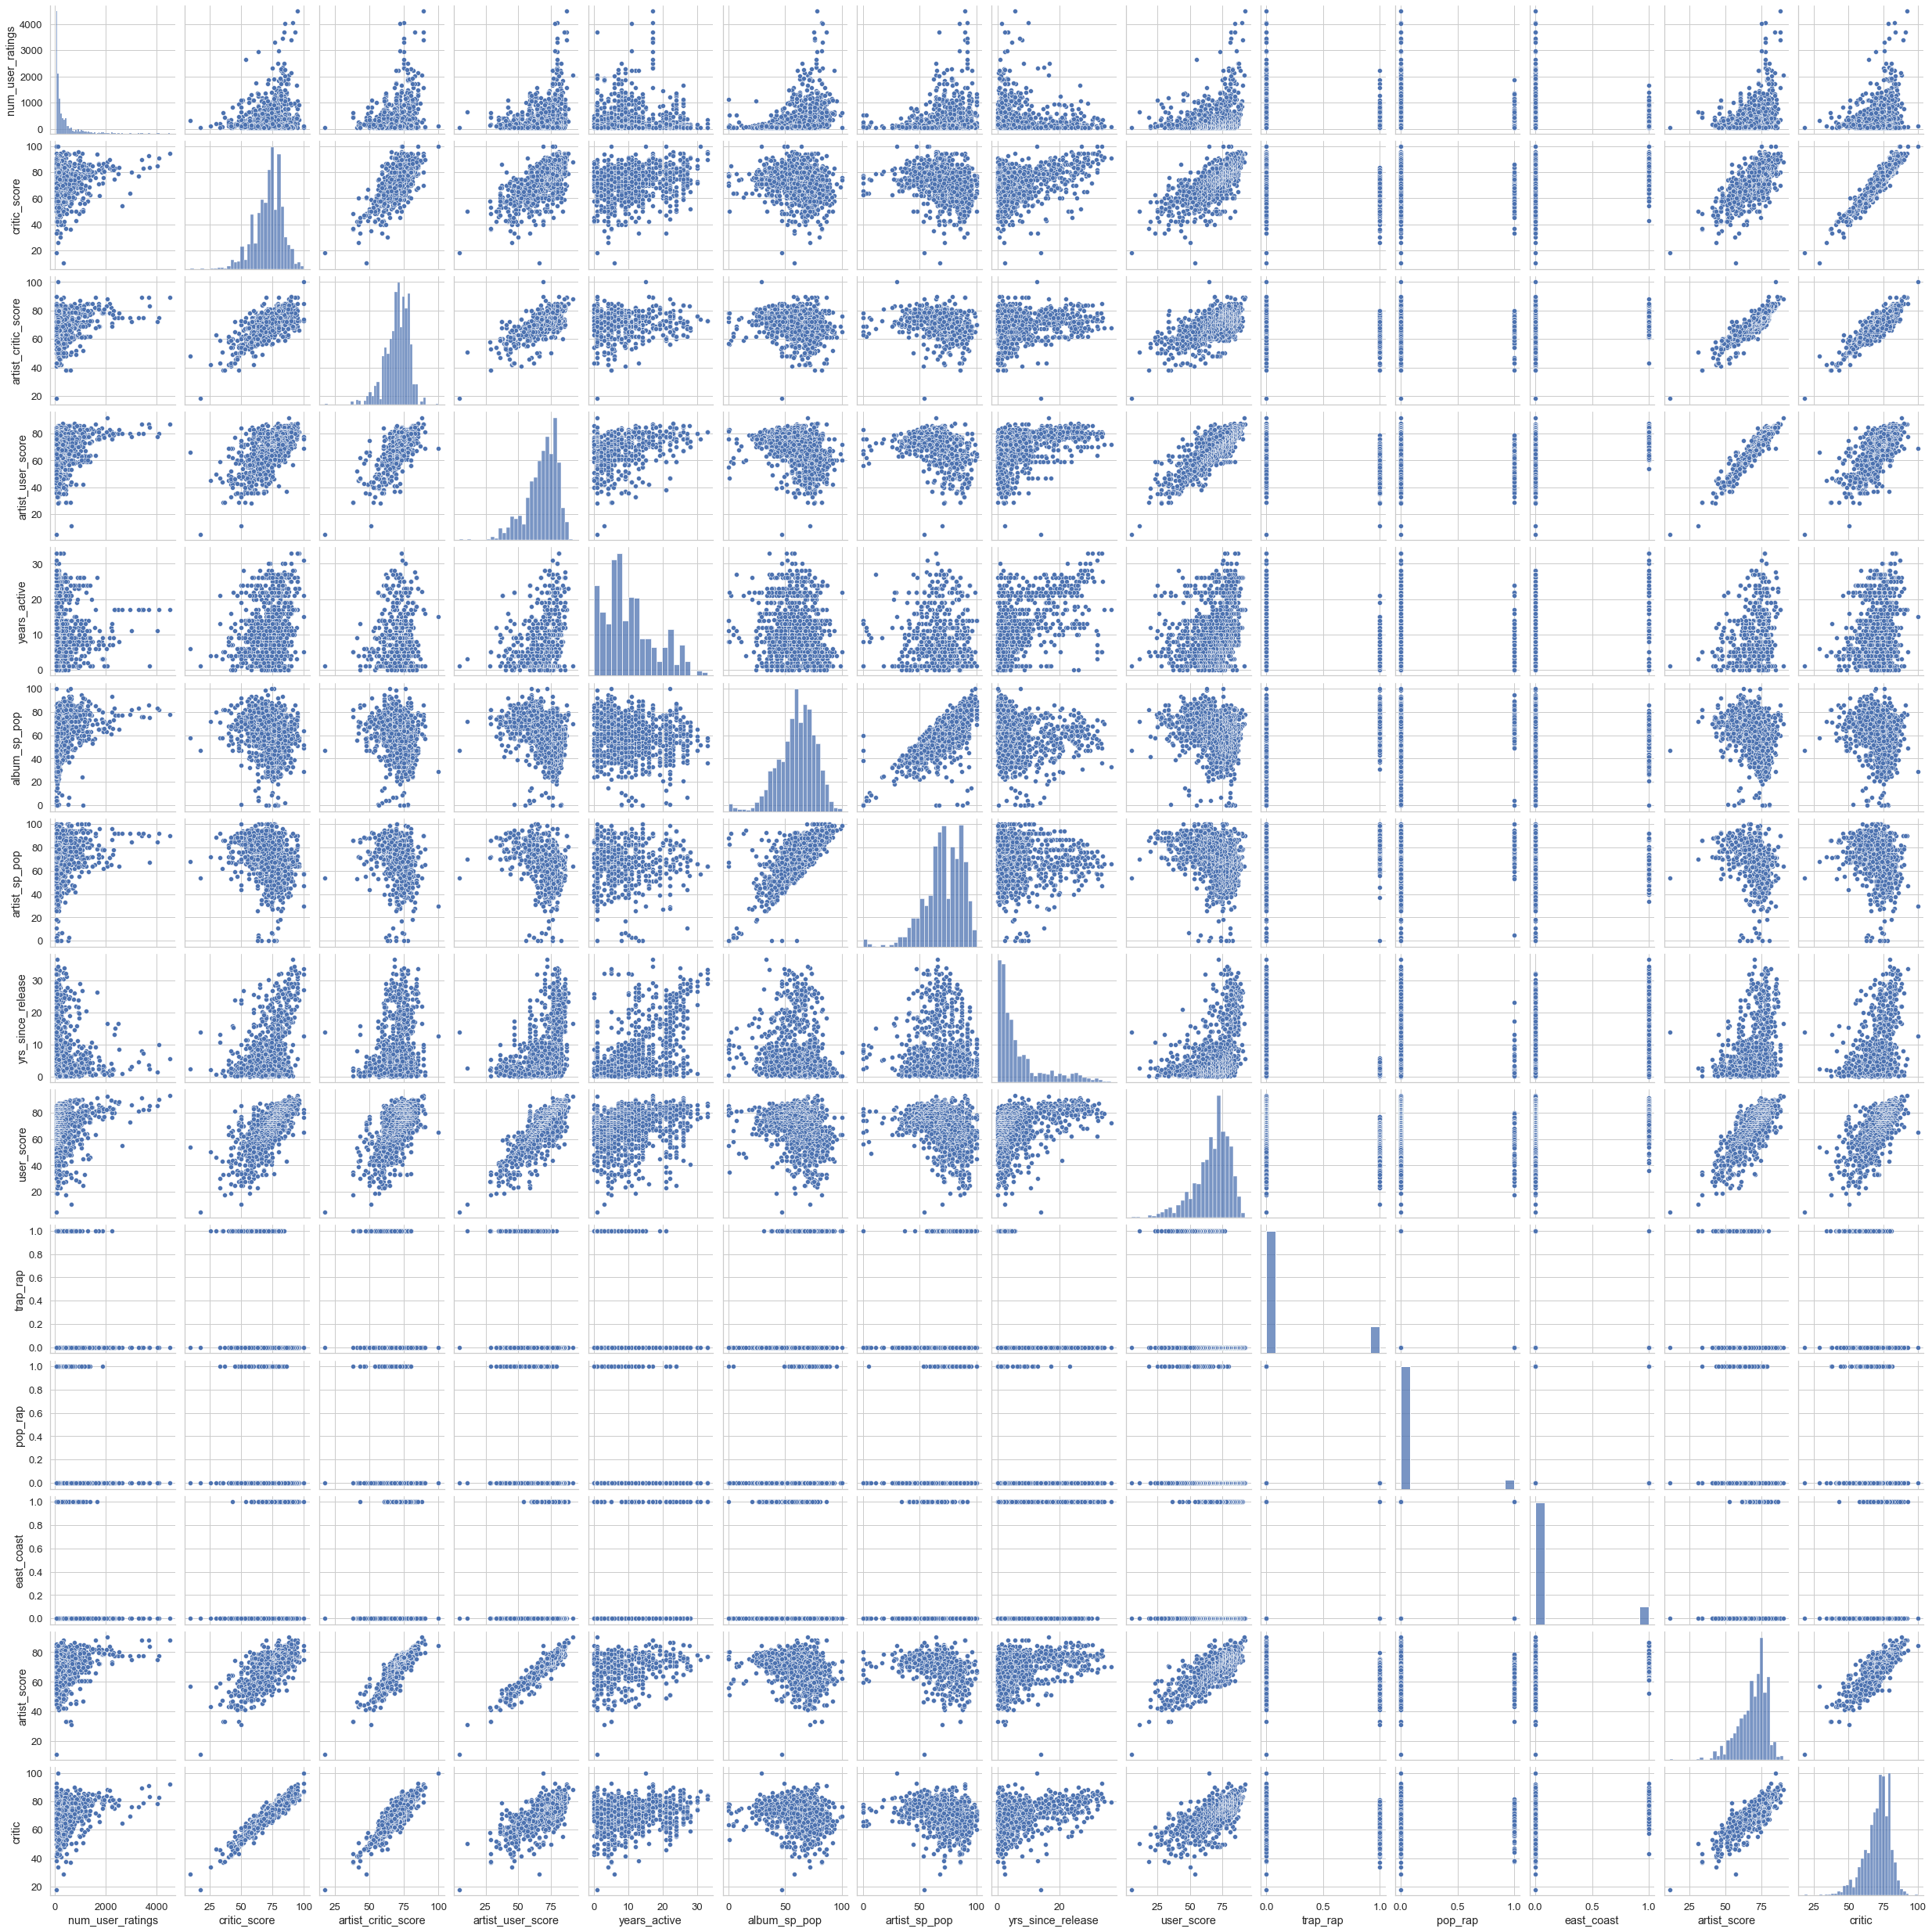

In [2073]:
# Pairplot to further evaluate correlations
sns.pairplot(df[corr_cols2]);

Observations of relationships between features and target:
- distribution of target is skewed to the left, but relatively normal?
    -> log transformation of target variable, correlations did not improve
- 'num_user_ratings' & 'yrs_since_release' right-skewed -> log transformation, correlations did not improve
- 'album_sp_pop' has negative, possibly quadratic relationship -> square transformation, correlations did not improve
- 'artist_sp_pop' has negative relationship, quadratic? -> square transformation, correlations did not improve

In [2074]:
# Features to test in model
test_cols = ['num_user_ratings',
 'critic_score',
 'years_active',
 'album_sp_pop',
 'yrs_since_release',
 'trap_rap',
 'pop_rap',
 'east_coast',
 'artist_score']

In [ ]:
# New features of 'pct_explicit', 'artist2', 'artist3'
# - pct_explicit is more correlated than explicit
# - artist2 has weak correlation, artist3 slightly better - excluded

In [2515]:
# Update correlated columns list
corr_cols = ['user_score',
 'instrumentalness',
 'feat',
 'num_user_ratings',
 'critic_score',
 'artist_critic_score',
 'artist_user_score',
 'years_active',
 'album_sp_pop',
 'artist_sp_pop',
 'yrs_since_release',
 'pct_explicit',
 'trap_rap',
 'pop_rap',
 'east_coast',
 'cp']

In [2517]:
# Re-evaluate correlations w/ target variable
df[corr_cols].corr()

user_score  instrumentalness      feat  num_user_ratings  \
user_score             1.000000          0.171437 -0.166648          0.231760   
instrumentalness       0.171437          1.000000 -0.145807         -0.052666   
feat                  -0.166648         -0.145807  1.000000         -0.009663   
num_user_ratings       0.231760         -0.052666 -0.009663          1.000000   
critic_score           0.702081          0.110414 -0.101308          0.186075   
artist_critic_score    0.616102          0.100480 -0.091858          0.206310   
artist_user_score      0.845185          0.197863 -0.183360          0.221063   
years_active           0.268577          0.083866 -0.056664          0.003551   
album_sp_pop          -0.260878         -0.171985  0.170455          0.333408   
artist_sp_pop         -0.352712         -0.207405  0.186061          0.237665   
yrs_since_release      0.436483          0.166032 -0.167483         -0.075814   
pct_explicit          -0.153552         -0.327204  0.247711          0.119054   
trap_rap              -0.396797         -0.117643  0.098927         -0.064084   
pop_rap               -0.229785         -0.077653  0.034427          0.010622   
east_coast             0.221255          0.017695  0.014022         -0.071488   
cp                     0.154916         -0.066122 -0.011784          0.068403   

                     critic_score  artist_critic_score  artist_user_score  \
user_score               0.702081             0.616102           0.845185   
instrumentalness         0.110414             0.100480           0.197863   
feat                    -0.101308            -0.091858          -0.183360   
num_user_ratings         0.186075             0.206310           0.221063   
critic_score             1.000000             0.749261           0.630613   
artist_critic_score      0.749261             1.000000           0.737795   
artist_user_score        0.630613             0.737795           1.000000   
years_active             0.215479             0.063349           0.318349   
album_sp_pop            -0.194681            -0.251292          -0.342292   
artist_sp_pop           -0.271763            -0.312429          -0.380149   
yrs_since_release        0.346463             0.114463           0.388735   
pct_explicit            -0.077387            -0.073766          -0.207957   
trap_rap                -0.284886            -0.277950          -0.433697   
pop_rap                 -0.149152            -0.151750          -0.227101   
east_coast               0.225864             0.141488           0.287169   
cp                       0.156868             0.175726           0.199506   

                     years_active  album_sp_pop  artist_sp_pop  \
user_score               0.268577     -0.260878      -0.352712   
instrumentalness         0.083866     -0.171985      -0.207405   
feat                    -0.056664      0.170455       0.186061   
num_user_ratings         0.003551      0.333408       0.237665   
critic_score             0.215479     -0.194681      -0.271763   
artist_critic_score      0.063349     -0.251292      -0.312429   
artist_user_score        0.318349     -0.342292      -0.380149   
years_active             1.000000     -0.113658       0.050090   
album_sp_pop            -0.113658      1.000000       0.756810   
artist_sp_pop            0.050090      0.756810       1.000000   
yrs_since_release        0.598847     -0.123192      -0.104638   
pct_explicit            -0.141894      0.316469       0.310668   
trap_rap                -0.332918      0.296556       0.269133   
pop_rap                 -0.027840      0.169694       0.133288   
east_coast               0.406421     -0.110807      -0.062209   
cp                       0.337970     -0.094119      -0.028058   

                     yrs_since_release  pct_explicit  trap_rap   pop_rap  \
user_score                    0.436483     -0.153552 -0.396797 -0.229785   
instrumentalness              0.166032     -0.327204 -0.11

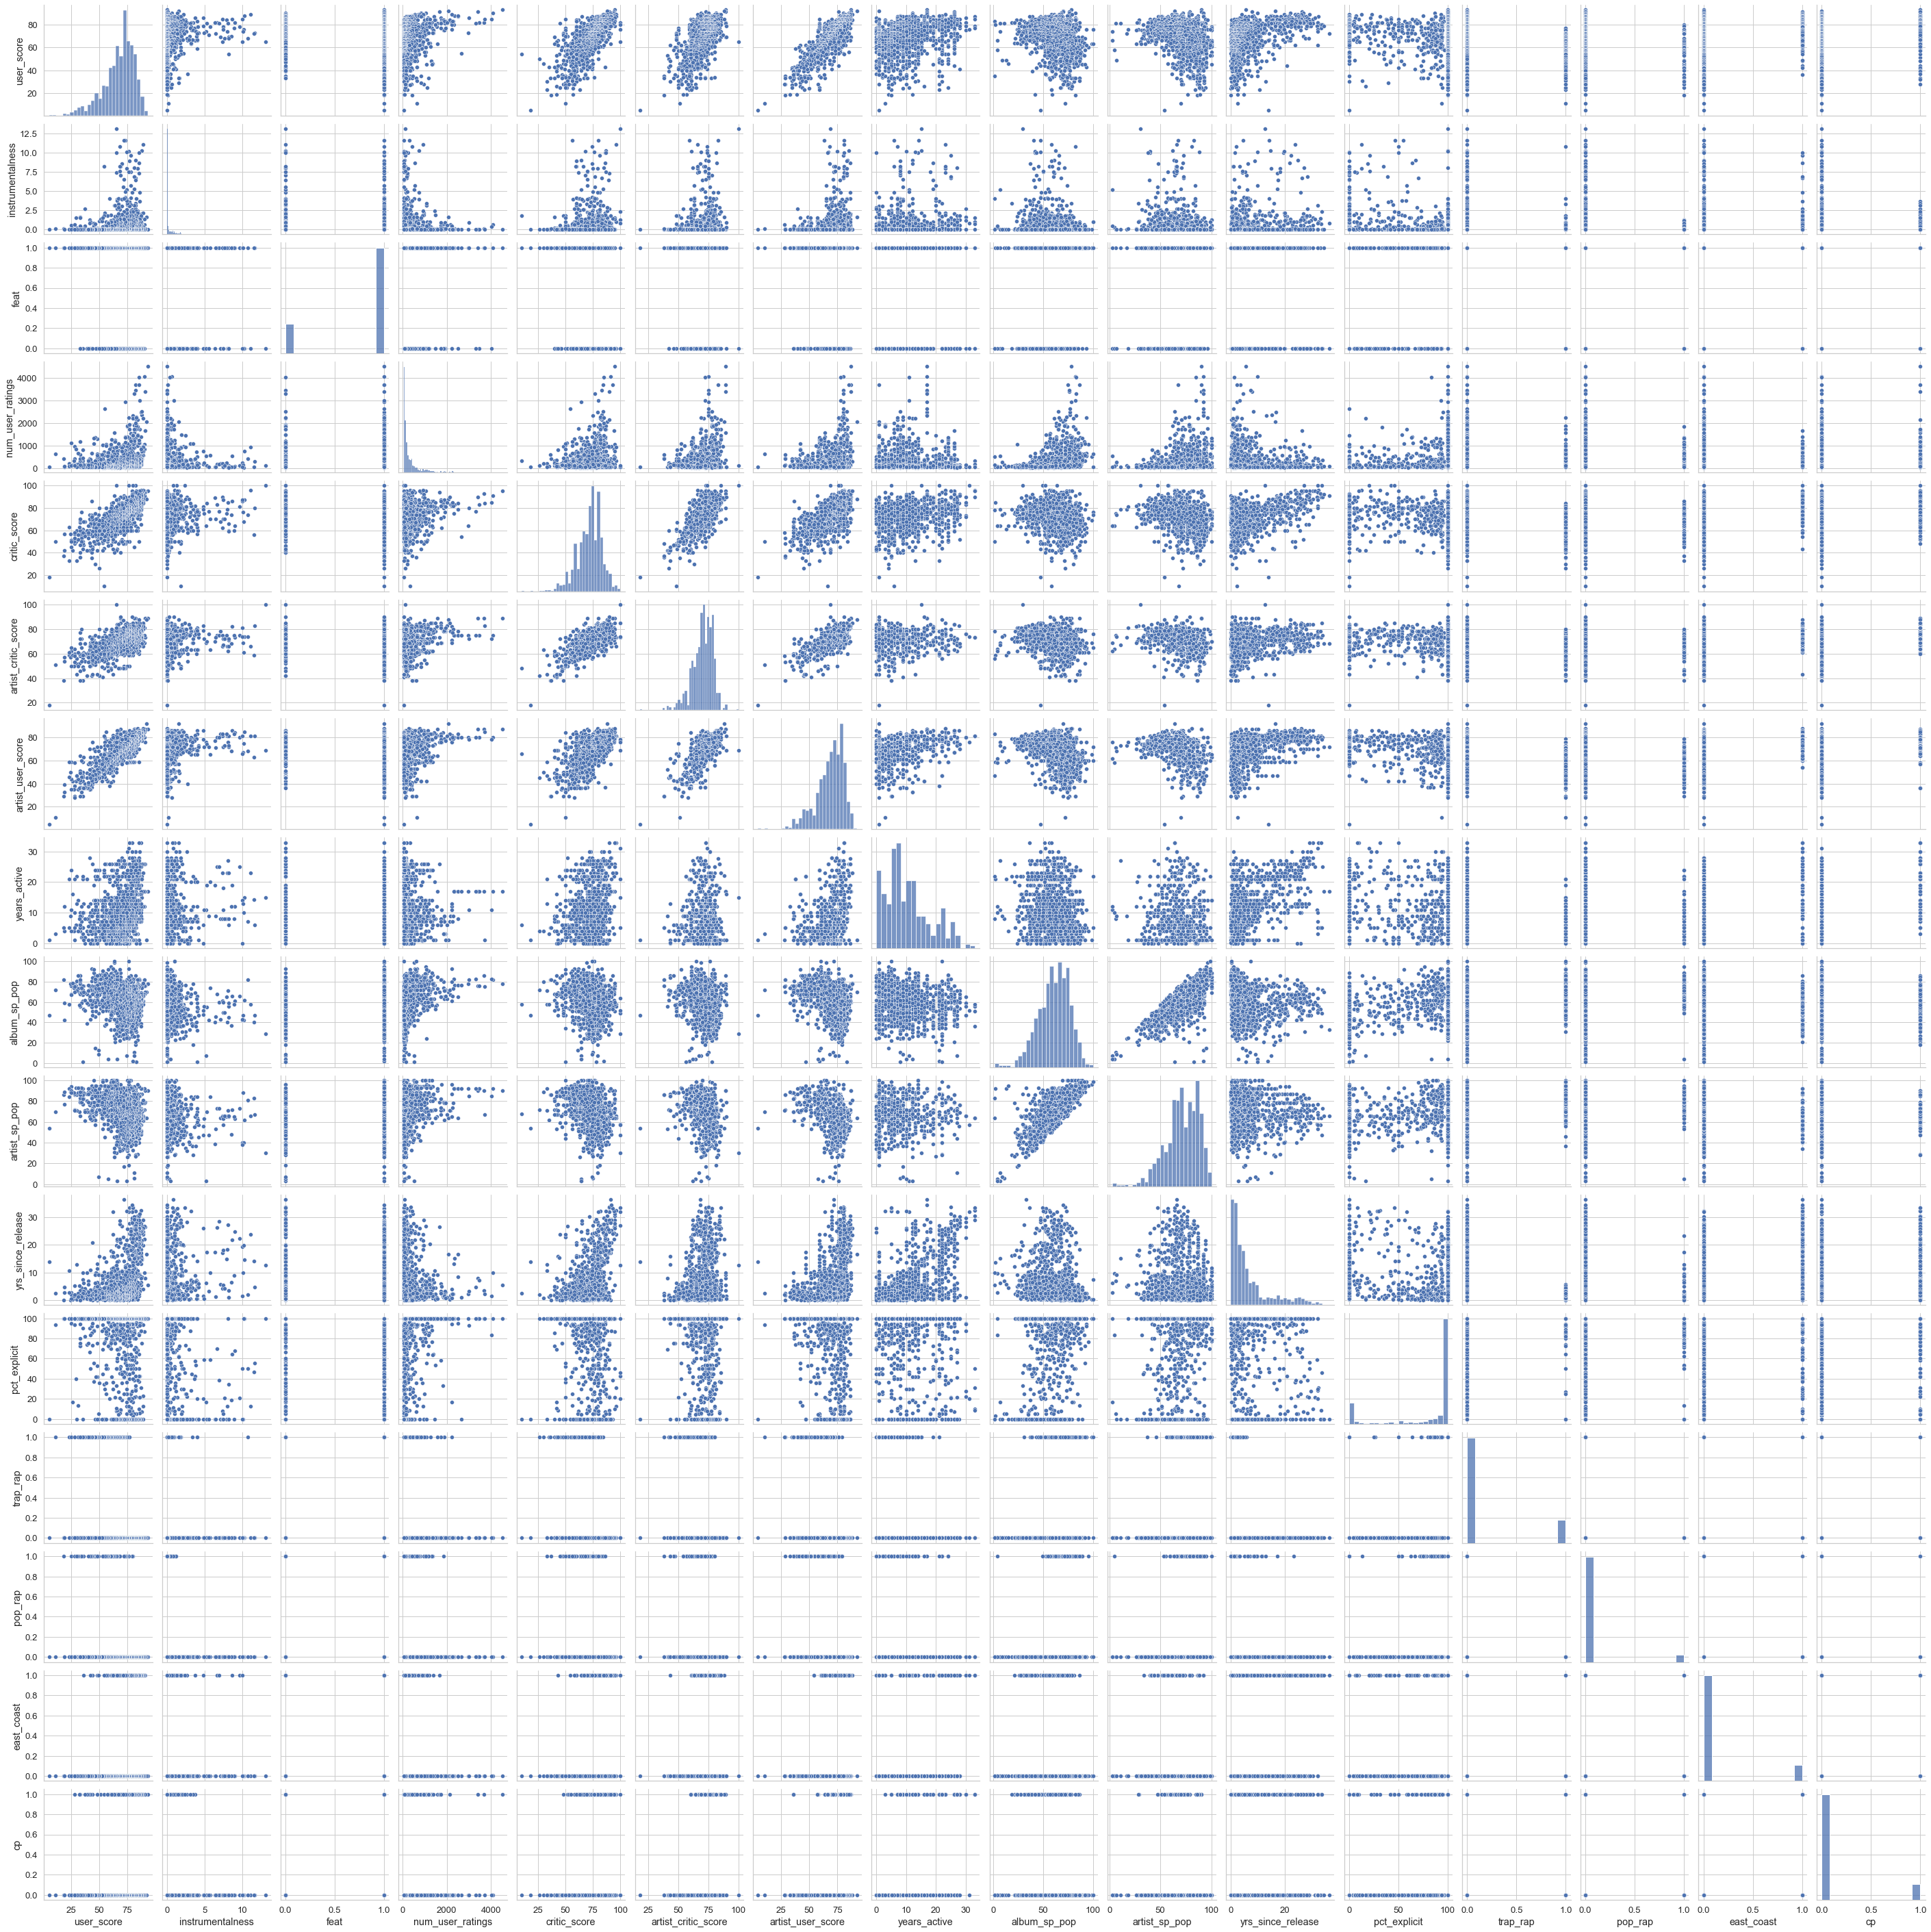

In [2518]:
# Pairplot correlations
sns.pairplot(df[corr_cols]);

Text(0.5, 1.0, 'Album critic score')

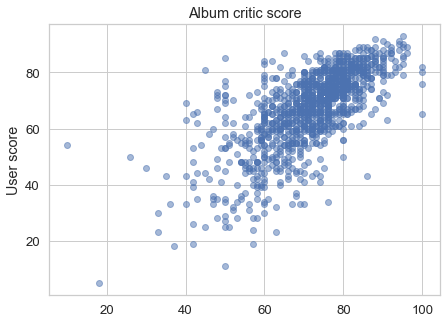

In [2680]:
# Look more closely at correlations of individual features

# Album critic score
plt.figure(figsize=(7,5))
plt.scatter('critic_score', 'user_score', data=df_nona, alpha=0.5)
plt.ylabel('User score')
plt.title('Album critic score');

Text(0.5, 1.0, 'Number of user ratings')

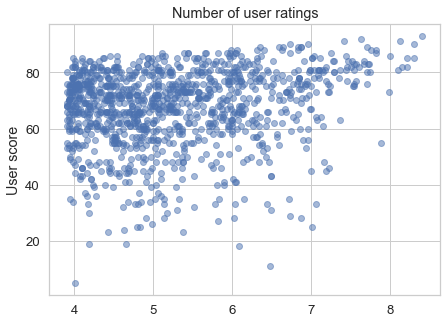

In [2682]:
# Number of user ratings
plt.figure(figsize=(7,5))
plt.scatter('nur_log', 'user_score', data=df_nona, alpha=0.5)
plt.ylabel('User score')
plt.title('Number of user ratings');

Text(0.5, 1.0, 'Years since release')

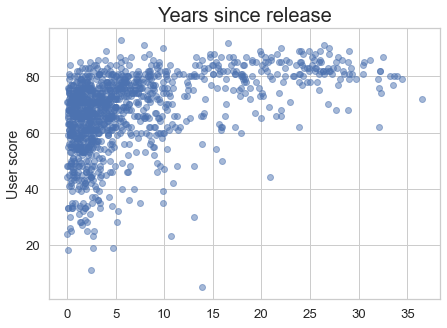

In [2685]:
# Years since release
plt.figure(figsize=(7,5))
plt.scatter('yrs_since_release', 'user_score', data=df_nona, alpha=0.5)
plt.ylabel('User score')
plt.title('Years since release');

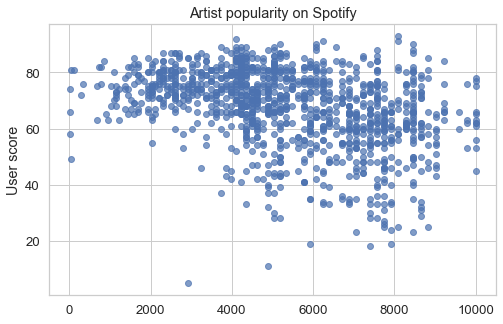

In [2684]:
# Plot moderately correlated variables/interesting relationships

plt.figure(figsize=(8,5))

#plt.scatter('album_sp_pop', 'user_score', data=df_nona, alpha=0.5)
#plt.ylabel('User score')
#plt.title('Album popularity on Spotify')

plt.scatter('artist_sp_pop_sq', 'user_score', data=df_nona, alpha=0.7)
plt.ylabel('User score')
plt.title('Artist popularity on Spotify');

In [ ]:
# Note negative relationship between popularity on Spotify and user score!

**Testing Models**

In [10]:
# Update features to test in model

# After repeated iterations/testing, final features
fin_cols = [
 'num_user_ratings',
 'artist_sp_pop',
 'yrs_since_release',
 'critic_score',
 'trap_rap',
 'pop_rap'
]

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import patsy
import scipy.stats as stats
import statsmodels.formula.api as smf

In [14]:
# Import model building module
import model_building.py

In [ ]:
# Partition date into train, validation, test sets
train_test_val(df, fin_cols, 'user_score')

In [17]:
# Feature scaling for train, val, and test
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [19]:
# Model w/ statsmodels OLS
sm_ols(X_train, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     183.3
Date:                Fri, 09 Oct 2020   Prob (F-statistic):          5.59e-140
Time:                        15:46:52   Log-Likelihood:                -2523.3
No. Observations:                 708   AIC:                             5061.
Df Residuals:                     701   BIC:                             5092.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                35.0597      3.026     11.585      0.000      29.118      41.001
num_user_ratings      0.0054      0.001      7.392      0.000       0.004       0.007
artist_sp_pop        -0.1543      0.023     -6.813      0.000      -0.199      -0.110
yrs_since_release     0.3588      0.047      7.583      0.000       0.266       0.452
critic_score          0.5661      0.033     17.301      0.000       0.502       0.630
trap_rap             -5.7785      0.960     -6.017      0.000      -7.664      -3.893
pop_rap              -7.5806      1.292     -5.866      0.000     -10.118      -5.043
==============================================================================
Omnibus:                      115.325   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.522
Skew:                          -0.947   Prob(JB):                     4.79e-49
Kurtosis:                       4.988   Cond. No.                     5.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Linear regression model w/ validation
linear_regression(X_train, X_val, y_train)

Linear regression val R^2: 0.648
Train/val ratio:  0.9430251989215062
MAE:  6.0311675172995445
RMSE:  8.78904351400556


In [24]:
# Polynomial transformation
polynomial(X_train, y_train)

Degree 2 polynomial regression val R^2: 0.671
Train/val ratio:  0.9930331827439287
MAE:  5.729397391718121
RMSE:  8.488357208378872


In [27]:
sm_ols(X_train_poly, y_train)

/Users/sunnajo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             user_score   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     56.91
Date:                Fri, 09 Oct 2020   Prob (F-statistic):          3.08e-145
Time:                        15:49:16   Log-Likelihood:                -2468.4
No. Observations:                 708   AIC:                             4987.
Df Residuals:                     683   BIC:                             5101.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.8512     14.435      4.216      0.000      32.509      89.193
x1             0.0107      0.010      1.059      0.290      -0.009       0.031
x2            -0.4285      0.216     -1.988      0.047      -0.852      -0.005
x3             0.8327      0.452      1.844      0.066      -0.054       1.719
x4             0.2338      0.257      0.908      0.364      -0.272       0.739
x5           -14.6762      4.340     -3.382      0.001     -23.197      -6.156
x6            -7.1095      5.099     -1.394      0.164     -17.122       2.902
x7         -2.278e-06   7.75e-07     -2.938      0.003    -3.8e-06   -7.56e-07
x8           3.06e-05   6.75e-05      0.453      0.650      -0.000       0.000
x9         -4.478e-05      0.000     -0.316      0.752      -0.000       0.000
x10        -1.778e-05      0.000     -0.165      0.869      -0.000       0.000
x11           -0.0011      0.003     -0.347      0.729      -0.007       0.005
x12           -0.0010      0.003     -0.307      0.759      -0.007       0.005
x13           -0.0041      0.001     -4.437      0.000      -0.006      -0.002
x14            0.0061      0.004      1.605      0.109      -0.001       0.014
x15            0.0098      0.002      4.225      0.000       0.005       0.014
x16            0.2906      0.078      3.736      0.000       0.138       0.443
x17            0.0317      0.088      0.361      0.718      -0.141       0.205
x18           -0.0252      0.006     -4.214      0.000      -0.037      -0.013
x19           -0.0019      0.005     -0.411      0.681      -0.011       0.007
x20            1.1370      0.722      1.575      0.116      -0.281       2.555
x21           -0.0347      0.261     -0.133      0.894      -0.547       0.478
x22           -0.0027      0.002     -1.770      0.077      -0.006       0.000
x23            0.0257      0.089      0.288      0.773      -0.149       0.200
x24            0.1017      0.107      0.946      0.344      -0.109       0.313
x25          -14.6762      4.340     -3.382      0.001     -23.197      -6.156
x26                 0          0        nan        nan           0           0
x27           -7.1095      5.099     -1.394      0.164     -17.122       2.902
==============================================================================
Omnibus:                      137.029   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.836
Skew:                          -0.905   Prob(JB):                     2.82e-99
Kurtosis:                       6.480   Cond. No.                     1.04e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-17. This might indic

In [28]:
# Scaling after polynomial transformation for regularization
scaler = StandardScaler()

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)

In [29]:
# Ridge regularization with linear regression
lr_ridge(X_train, X_val, y_train)

Ridge Regression val R^2: 0.648
Train/val ratio:  0.9431070508260818
MAE:  6.0323360938452835
RMSE:  8.789751118702952


In [30]:
list(zip(X.columns, lm_reg.coef_))

[('num_user_ratings', 2.5868149468723423),
 ('artist_sp_pop', -2.4654560669364174),
 ('yrs_since_release', 2.7428089084757716),
 ('critic_score', 6.457012760237778),
 ('trap_rap', -2.196182109699457),
 ('pop_rap', -1.9760476425948714)]

In [31]:
lr_poly(X_train, X_val, y_train)

Ridge Regression w/ Polynomial val R^2: 0.672
Train/val ratio:  0.9918982582941953
MAE:  5.725104524368283
RMSE:  8.483538687719241


In [32]:
list(zip(poly.get_feature_names(X.columns), lm_poly_reg.coef_))

[('1', 0.0),
 ('num_user_ratings', 3.53253126129489),
 ('artist_sp_pop', -5.53862050548256),
 ('yrs_since_release', 5.883264918263317),
 ('critic_score', 3.428828805579217),
 ('trap_rap', -4.961517368260755),
 ('pop_rap', -1.6800560080764921),
 ('num_user_ratings^2', -3.090809224812799),
 ('num_user_ratings artist_sp_pop', 1.4263117862222328),
 ('num_user_ratings yrs_since_release', -0.1997243460917453),
 ('num_user_ratings critic_score', 0.8125429365668702),
 ('num_user_ratings trap_rap', -0.04875662648798505),
 ('num_user_ratings pop_rap', -0.09405244870312271),
 ('artist_sp_pop^2', -8.439534099256266),
 ('artist_sp_pop yrs_since_release', 3.324499500254347),
 ('artist_sp_pop critic_score', 10.405416266095468),
 ('artist_sp_pop trap_rap', 7.60640130291861),
 ('artist_sp_pop pop_rap', 0.2714512089409598),
 ('yrs_since_release^2', -5.192287969080308),
 ('yrs_since_release critic_score', -1.0115152894177477),
 ('yrs_since_release trap_rap', 0.8610921571665547),
 ('yrs_since_release pop_

In [36]:
# Linear regression w/ Lasso model
lr_lasso(X_train, X_val, y_train)

Lasso Regression val R^2: 0.648
Train/val ratio:  0.9424074676376691
MAE:  1281.9773224116443
RMSE:  1966.626146074118


In [38]:
# Polynomial w/ Lasso
poly_lasso(X_train, X_val, y_train)

Lasso Polynomial val R^2: 0.663
Train/val ratio:  0.9763151733050749
MAE:  5.8099742946985575
RMSE:  8.59882785411851


In [39]:
list(zip(poly.get_feature_names(X.columns), lasso_model.coef_))

[('1', 0.0),
 ('num_user_ratings', 3.589696585892937),
 ('artist_sp_pop', -0.0),
 ('yrs_since_release', 3.2249848658348013),
 ('critic_score', 4.375112328848401),
 ('trap_rap', -1.9516228181613493),
 ('pop_rap', -0.17514182927962088),
 ('num_user_ratings^2', -1.5741039751180004),
 ('num_user_ratings artist_sp_pop', 0.0),
 ('num_user_ratings yrs_since_release', 0.07410944874687536),
 ('num_user_ratings critic_score', 0.24844552394391448),
 ('num_user_ratings trap_rap', 0.281906133612464),
 ('num_user_ratings pop_rap', 0.0),
 ('artist_sp_pop^2', -6.45341541844564),
 ('artist_sp_pop yrs_since_release', 3.0728973667514126),
 ('artist_sp_pop critic_score', 3.423112456567968),
 ('artist_sp_pop trap_rap', 0.0),
 ('artist_sp_pop pop_rap', -1.4094526556847673),
 ('yrs_since_release^2', -3.711293034674667),
 ('yrs_since_release critic_score', -0.0),
 ('yrs_since_release trap_rap', 0.34871289461699617),
 ('yrs_since_release pop_rap', 0.0),
 ('critic_score^2', -0.0),
 ('critic_score trap_rap', -0.

It looks like a polynomial regression model may be the best, but we will reinforce this with cross-validation.

**Cross-validation*

In [42]:
train_test_cv(df, fin_cols, 'user_score')

In [43]:
# Linear regression
lr_cv(X, y)

Linear regression train scores:  [0.6240118277076359, 0.6099317790113546, 0.6225355296714356, 0.6191920887539352, 0.6410970982883879]
Linear regression val scores:  [0.6149254620475233, 0.6714487129923896, 0.6165426731907706, 0.6290862317968757, 0.5420381873090379] 

Linear regression mean val score: 0.615 +- 0.042 

Mean train/val ratio: 1.020 +- 0.090
Mean MAE:  6.24204420724922
Mean RMSE:  8.669128426188019


In [45]:
# Polynomial regression
poly_cv(X, y)

Polynomial train scores: [0.6696464461287797, 0.6770218218492673, 0.6671319896177943, 0.6728928828046505, 0.6654485084161552, 0.6779530909988056, 0.6707777812429139, 0.6688642885945978, 0.69224789630094, 0.6740334578972214]
Polynomial val scores:  [0.6833392697554437, 0.6250624699446442, 0.699306075063509, 0.6551069737134378, 0.7327140072878991, 0.5940887925726108, 0.6761659952852055, 0.6800460500264677, 0.5098675556386261, 0.6384582086721529]
Polynomial mean val score: 0.649 +- 0.060
Mean train/val ratio: 1.048 +- 0.121 

Mean MAE:  6.24204420724922
Mean RMSE:  8.669128426188019


In [46]:
# Ridge regularization w/ linear regression
lr_ridge_cv(X, y)

Ridge linear regression train scores:  [0.6239667517287057, 0.6098857112932229, 0.6224912152553514, 0.6191444525733969, 0.6410522084667882]
R linear regression val scores:  [0.614809107367337, 0.6706475903982259, 0.6166616429946215, 0.6296444401000231, 0.542882249348343] 

Ridge linear regression mean val score: 0.615 +- 0.041 

Mean train/val ratio: 1.005 +- 0.096
Mean MAE:  6.241936950369416
Mean RMSE:  8.668558642895631


In [47]:
# Polynomial regression w/ ridge regularization
poly_ridge_cv(X, y)

Rdige polynomial train scores: [0.6631431048221064, 0.6698195211162066, 0.6601088057975477, 0.6650805495783478, 0.6586126035577825, 0.67071127442758, 0.6638383763515341, 0.6618427978366919, 0.691746690533901, 0.6668609262667864]
Ridge polynomial val scores:  [0.664671211057522, 0.6235348386015314, 0.6877466718740247, 0.6692252433304887, 0.7268019292153793, 0.5993199128586898, 0.6663469528511209, 0.6802263692503221, 0.5187491652174762, 0.6401413484106082]
Ridge polynomial mean val score: 0.648 +- 0.054
alpha:  10.0 

Mean train/val ratio: 1.040 +- 0.113 

Ridge polynomial mean RMSE:  8.26376539175936


In [48]:
# Lasso regularization w/ linear
lr_lasso_cv(X, y)

Lasso regression train scores:  [0.6240095541795208, 0.6097030972247247, 0.6225333048971461, 0.6191898489466083, 0.6410948115611377]
Lasso regression val scores:  [0.6148532439510618, 0.6689442523816482, 0.616778836693701, 0.6288466994561441, 0.5423772075498527]
Lasso regression mean val scores: 0.614 +- 0.041
alpha:  0.01 

Mean train/val ratio: 1.020 +- 0.089 

Lasso regression mean MSE:  75.6788037705995


In [49]:
# Lasso regularization w/ polynomial
poly_lasso_cv(X, y)

/Users/sunnajo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.56440060777095, tolerance: 16.06071811764706
  positive)


Lasso polynomial val scores:  [0.6600751347791136, 0.6153179184926654, 0.6658749733590805, 0.6599133320233533, 0.7169523097373298, 0.5940310016628171, 0.6725989629620406, 0.6784764417401059, 0.5115625161220583, 0.6313188496617763]
Lasso polynomial mean cv r^2: 0.641 +- 0.054
alpha:  0.1011637979766207 

Mean train/val ratio: 1.041 +- 0.118 

Lasso polynomial mean MSE:  70.87315700178999


Based on the cross-validation, a degree 2 polynomial regression model appears to be the best. We will move forward with this model, re-train it with all of the training and validation data sets, and score/evaluate it on the test data.

**Final model: Degree 2 polynomial regression**

In [ ]:
train_test(df, fin_cols, 'user_score')

In [53]:
poly_final(X_train, y_train)

r2 train:  0.6722705825697093
r2 test:  0.6653207414088285
Train/test ratio:  1.0104458507428529
MAE:  5.293228480710712
RMSE:  7.172162037676301


In [54]:
list(zip(poly.get_feature_names(X.columns), lm_poly.coef_))

[('1', -5.411818600232538e-10),
 ('num_user_ratings', 0.005210882489516529),
 ('artist_sp_pop', -0.4924467125560533),
 ('yrs_since_release', 1.1471253831904682),
 ('critic_score', 0.30008338567880843),
 ('trap_rap', -9.164194547763435),
 ('pop_rap', -8.562674893361223),
 ('num_user_ratings^2', -2.2380595231241594e-06),
 ('num_user_ratings artist_sp_pop', 5.829513844070999e-05),
 ('num_user_ratings yrs_since_release', -0.00011734720898657114),
 ('num_user_ratings critic_score', 3.002808110297742e-05),
 ('num_user_ratings trap_rap', -0.003999873806622747),
 ('num_user_ratings pop_rap', -0.002979666570402156),
 ('artist_sp_pop^2', -0.0036426316876691164),
 ('artist_sp_pop yrs_since_release', 0.003847758051401358),
 ('artist_sp_pop critic_score', 0.009748096652487886),
 ('artist_sp_pop trap_rap', 0.26991668499165355),
 ('artist_sp_pop pop_rap', 0.0839641810409235),
 ('yrs_since_release^2', -0.02440754392171957),
 ('yrs_since_release critic_score', -0.004066878345292359),
 ('yrs_since_relea

In [57]:
lm_poly.intercept_

58.76621171712685

We want to further assess whether or not this model satisfies the assumptions of linear regression by looking at the variance and distribution of the residuals.

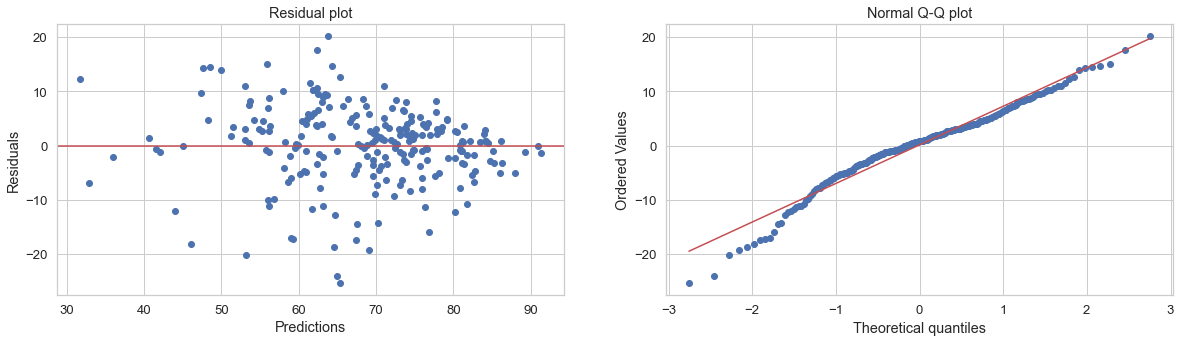

In [2674]:
# Plot residuals for model to assess assumptions of homoscedasticity
# and normal distribution of residuals
residuals_plots(y_test, y_pred)

We also want to evaluate the model by looking at the correlation between the predicted values obtained from the model with the actual values in the test set.

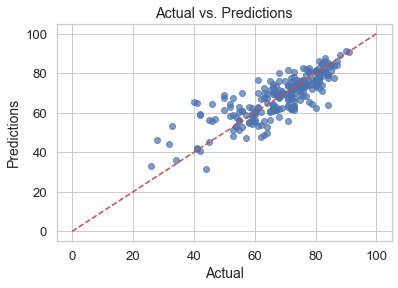

In [2705]:
# Assess correlation between actual and predicted values for model
test_vs_pred(y_test, y_pred)

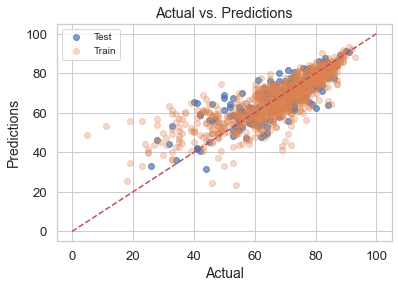

In [2706]:
# Compare predictions from train sets and test sets
compare_train_test(y_test, y_train, y_pred, X_train, lm)

In [2783]:
# Look at distribution and other statistical metrics of predicted values with final model
pd.DataFrame(y_pred).describe()

0
count  236.000000
mean    67.549391
std     11.084375
min     32.524928
25%     60.493780
50%     69.252127
75%     74.808338
max     90.743604

**Summary of Process/Workflow:**

I used an iterative design process. I started out by testing a OLS linear regression model with features that had a correlation with the target variable of at least 0.2 with statsmodels. This model performed poorly (maximum R^2 score <0.5, high multi-collinearity, high complexity) and had several features that were not statistically significant. These features were re-evaluated and engineered (e.g. log or quadratic transformation, combined with co-linear features), the model was re-run, and the majority of these features were ultimately eliminated as they did not improve the model and remained statistically insignificant. Once a set of features that were statistically significant and did not appear obviously/highly colinear with a OLS R^2 score of >0.6 was obtained, linear regression models with and without regularization and polynomial regression models with and without regularization were validated and evaluated through calculating various metrics, such as the R^2 scores of the model run on both the training and validation sets, the training/validation R^2 score ratios, mean MAEs, mean RMSEs. Through regularization, a few variables were removed with improvement in the model. The final model was a degree 2 polynomial regression model with the following six features: number of user ratings of the album on AOTY, critic score of the album on AOTY, years since release of the album, whether or not the album was of the trap rap genre, whether or not the album was of the pop rap genre, the popularity of the artist on Spotify.

**Results/Conclusions:**
- The degree 2 polynomial regression model had a fairly good fit, with R^2 score 0.667 and low MAE/RMSE. Our predicted values for the target variable also had a linear correlation with the actual values.
- The model appeared to perform better with higher user scores. The residuals also had less variance at higher user scores. This may be due to the slightly skewed distribution of the target variable with higher user scores being more common than lower scores and/or the presence of low outliers.
- Looking at the coefficients of the features in the final model, it appears that the number of user ratings for the album, years since release of the album, and critic score of the album are positively correlated with user score, while the trap rap and pop rap genres and the popularity of the artist on Spotify are negatively correlated. The coefficient for the number of user ratings feature was relatively small but the model performed better when this variable was included, suggesting an interaction.
- While these relations are not definitive, these observations may be able to inform decisions about analysis of trends in the hip hop industry/consumption and future production of hip hop albums. It would be interesting to further analyze these correlations, especially why artists who are popular on Spotify produce albums that are rated less favorably by users, as well as to further analyze the outliers and possible interactions.